# Image Feature Extract

## Image Feature

In [ ]:
def image_to_feature_vector(image, size=(64, 64)):
    # resize the image to a fixed size, then flatten the image into
    # a list of raw pixel intensities
    return cv2.resize(image, size).flatten()

## color histogram

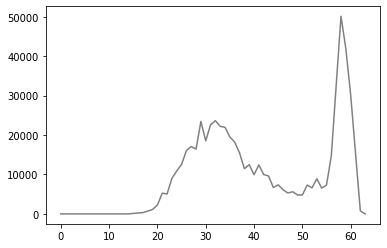

In [4]:
## in gray pic
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('./Image Feature/1.png',0)
hist_255 = cv2.calcHist([img],[0], None, [64], [0.0,255.0])
plt.plot(hist_255,'gray')

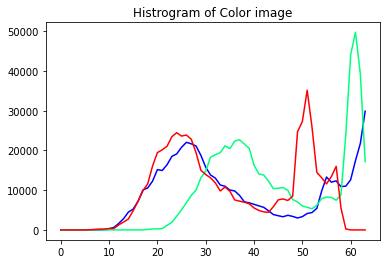

In [11]:
## in colorful pic
img = cv2.imread('./Image Feature/1.png')
color = ['blue','springgreen','red'] 
for i in [0,1,2]:
    hist = cv2.calcHist([img],[i], None, [64], [0.0,255.0])   
    plt.plot(hist, color[i])
    plt.title('Histrogram of Color image')
plt.show()

## Color Moments

### RGB Color Moments

In [25]:
## get color moments
import numpy as np

img = cv2.imread('./Image Feature/1.png')

def get_color_moments(img):
    img_array = np.array(img)
    color_moments = []
    for i in range(3):
        # compute moments for different channel
        img_channel = img_array[:,:,i]
        color_moments.append(np.mean(img_channel))
        color_moments.append(np.std(img_channel))
        mid = np.mean(((img_channel - img_channel.mean()) ** 3))
        thrid_moment = np.sign(mid) * abs(mid) ** (1/3)
        color_moments.append(thrid_moment)
        
    return color_moments

get_color_moments(img)

[158.84098187792736,
 66.31994865919904,
 41.212845420592934,
 184.24526349346476,
 49.57020020643062,
 17.240405523930512,
 144.0581475759582,
 53.340747998023765,
 29.835485580619768]

### HSL Color Moments

In [ ]:
img_hsl = 

### Lab Color Moments

##  Color Coherence Vectors

by classifying each pixel as either coherent or incoherent. Coherent pixel means that it is part of a big connected component (CC) while incoherent pixel means that it is part of a small connected component

In [59]:
## define get_ccv function
labelCount = 0;

def processColorCoherenceVector(im):
    matrix = convertImageToMatrix(im)
    computeImageDimensions(matrix)
    matrix = computeImageBlur(matrix)
    matrix = computeDiscretization(matrix)
    labelMatrix, connectedComponentTable = computeConnectedComponents(matrix)
    ccv = computeColorCoherenceVector(connectedComponentTable)
    return ccv

def computeImageDimensions(matrix):
    global WIDTH
    global HEIGHT
    global SIZE
    global TOU
    WIDTH = len(matrix)
    HEIGHT = len(matrix[0])
    SIZE = WIDTH * HEIGHT
    TOU = SIZE / 100

def convertImageToMatrix(inputImageFilename):

    size = Image.open(inputImageFilename).size
    im=Image.open(inputImageFilename)
    rgb_im = im.convert('RGB')
    image=[]
    for x in range(size[0]):
        image.append([])
        for y in range(size[1]):
            inten=list(rgb_im.getpixel((x,y)))
            image[x].append(inten)
    
    return image

def computeImageBlur(image):
    for x in range(0, WIDTH):
        for y in range(0, HEIGHT):
            image[x][y] = averageOfNeighbors(x, y, image)
    return image

def computeDiscretization(image):
    for x in range(0, WIDTH):
        for y in range(0, HEIGHT):
            for i in range (3):
                image[x][y][i]=image[x][y][i] / 4
    
    return image

def computeConnectedComponents(image):
    connectedComponentTable = {}
    labelImage = copy.deepcopy(image)
    for x in range(0, WIDTH):
        for y in range(0, HEIGHT):
            labelImage[x][y] = None
            
    listOfPixels = computeListOfPixelsInOrder()
    index = 0
    while index < len(listOfPixels):
        (x, y) = listOfPixels[index]
        if(labelImage[x][y] is None):
            for i in range(-1, 2):
                for j in range(-1, 2):
                    nx = x + i
                    ny = y + j
                    if(nx >= 0 and nx < WIDTH and ny >= 0 and ny < HEIGHT and labelImage[x][y] is None and labelImage[nx][ny] is not None and image[x][y] == image[nx][ny]):
                        labelImage[x][y] = labelImage[nx][ny]
                        incrementConnectedComponentsTable(connectedComponentTable, labelImage[nx][ny], image[nx][ny])                        
                        
        if(labelImage[x][y] is None):
            labelImage[x][y] = getNextLabel()
            incrementConnectedComponentsTable(connectedComponentTable, labelImage[x][y], image[x][y])
            
        for i in range(-1, 2):
            for j in range(-1, 2):
                nx = x + i
                ny = y + j
                if(nx >= 0 and nx < WIDTH and ny >= 0 and ny < HEIGHT and labelImage[nx][ny] is None and image[x][y] == image[nx][ny]):
                    labelImage[nx][ny] = labelImage[x][y]
                    incrementConnectedComponentsTable(connectedComponentTable, labelImage[nx][ny], image[nx][ny])
                    listOfPixels.insert(index+1, (nx, ny))
        
        index = index + 1
           
    return labelImage, connectedComponentTable

def computeColorCoherenceVector(connectedComponentTable):
    tempCCT = {}
    colorCoherenceVector = {}
    
    for key, (label, color, size) in connectedComponentTable.items():
        if(size >= TOU):
            tempCCT[key] = (label, color, size, True)
        else:
            tempCCT[key] = (label, color, size, False)

    for (label, color, size, coherence) in tempCCT.values():
        if(coherence == True):
            clr=':'.join(str(r) for r in color)
            (alpha, beta) = colorCoherenceVector.get(clr, (0, 0))
            colorCoherenceVector[clr] = (alpha + size, beta)
        else:
            clr=':'.join(str(r) for r in color)
            (alpha, beta) = colorCoherenceVector.get(clr, (0, 0))
            colorCoherenceVector[clr] = (alpha, beta + size)

    return colorCoherenceVector

def averageOfNeighbors(x, y, image):
    value = [0,0,0]
    count = 0
    for i in range(-1, 2):
        for j in range(-1, 2):
            nx = x + i
            ny = y + j
            if(nx >= 0 and nx < WIDTH and ny >= 0 and ny < HEIGHT):
                for li in range(3):
                    value[li] = value[li] +  image[nx][ny][li]
                count = count + 1
    for li1 in range(3):
        value[li1]=value[li1]/count
    return value

def computeListOfPixelsInOrder():
    listOfPixels = []
    for x in range(0, WIDTH):
        for y in range(0, HEIGHT):
            listOfPixels.append((x,y))
    return listOfPixels

def incrementConnectedComponentsTable(connectedComponentTable, label, color):
    key = str(label) + "_" + str(color)
    (receivedLabel, receivedColor, receivedSize) = connectedComponentTable.get(key, (label, color, 0))
    connectedComponentTable[key] = (receivedLabel, receivedColor, receivedSize + 1)

def getNextLabel():
    global labelCount
    label = str(labelCount)
    labelCount = labelCount + 1
    return label

In [61]:
## too slow 
import copy
from PIL import Image
ccv=processColorCoherenceVector("./Image Feature/1.png")
plt.hist(ccv)
plt.show()

KeyboardInterrupt: 

## HOG 

## LBP

## Haar